Exercise taken from "Hands-On Machine Learning with scikit-Learn, Keras & Tensorflow" by 
Géron

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[17]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap="binary")



plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
import numpy as np

y = y.astype(np.uint8)

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
#Classify only number 8
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

#try stochastic gradient descent to train the network

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Accuracy measures


In [7]:
#Accuracy 
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.85245738, 0.9276    , 0.94119706])

In [8]:
#Confusion matrix
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_8, y_train_pred)

array([[50135,  4014],
       [ 1561,  4290]], dtype=int64)

In [9]:
#precision and recall
#PRECISION = TP/(TP+FP)
#RECALL = TP/(TP+FN)

from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_8, y_train_pred))

print(recall_score(y_train_8, y_train_pred))

0.5166184971098265
0.7332079986327124


In [10]:
#F1 score: precision and recall combined, harmonic mean of precision and recall. It gives much more weight to
#low values
from sklearn.metrics import f1_score

f1_score(y_train_8, y_train_pred)

0.6061462380784175

In [11]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores)
threshold = 0
y_some_digit_predict = (y_scores > threshold)
print(y_some_digit_predict)

[1089.15759949]
[ True]


In [12]:
#raising the threshold, decreases the recall
threshold = 3000
y_some_digit_predict = (y_scores > threshold)
print(y_some_digit_predict)

[False]


In [13]:
#To decide which threshold to use we can use the precision_recall_curve()

#decision_function to have decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

In [14]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_scores)

In [15]:
def plot_precision_recall_vs_threshold(precisions, recall, thresholds):
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    

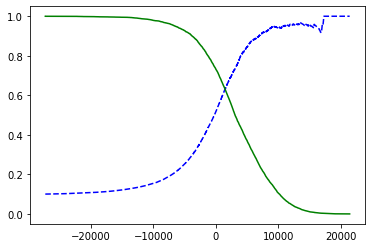

In [16]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [17]:
#Reciver Operating Characteristic (ROC): it plots the true positive rate against the
#false positive rate

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_8, y_scores)

In [18]:
def plot_roc_curve(fpr, tpr, label=None):
    
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], "k--")

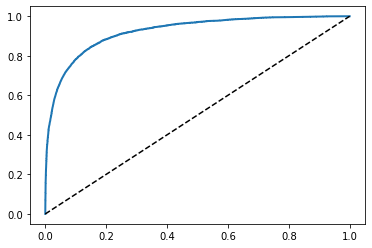

In [19]:
plot_roc_curve(fpr, tpr)
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_8, y_scores)

0.9228251358406578

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest= cross_val_predict(forest_clf, X_train, y_train_8, cv = 3, method="predict_proba")

D:\Programmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Programmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Programmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


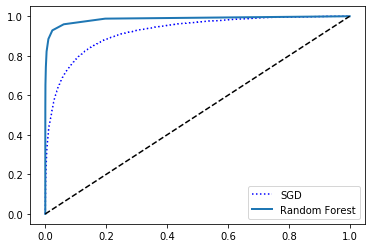

0.9861948758156529

In [22]:
y_score_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8, y_score_forest)

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

roc_auc_score(y_train_8, y_score_forest)

In [ ]:
#Multiclass Classification

from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

d:\programmi\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)
print(np.argmax(some_digit_scores))
print(svm_clf.classes_)

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

d:\programmi\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])
sgd_clf.decision_function([some_digit])

array([[-30174.75997191,  -6604.33236922,  -9408.61252328,
         -6609.45437577, -10872.07768781,  -7164.59205179,
        -33187.28170565, -20983.16457984,   2169.70430132,
         -4161.81542585]])

In [24]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring = "accuracy")

array([0.87082583, 0.87089354, 0.88628294])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

D:\Programmi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.89957009, 0.89344467, 0.89963495])

D:\Programmi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


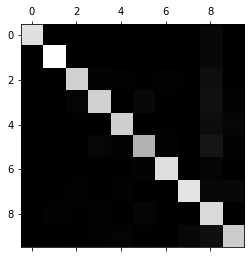

In [24]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

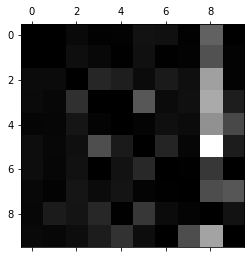

In [27]:
row_sums = conf_mx.sum(axis=1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

In [30]:
#Multilabel classification

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train%2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd] #concatenate two arrays of features

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
knn_clf.predict([some_digit]) #8 is large but not odd

array([[ True, False]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [ ]:
#multioutput classification: each label can be multiclass (more than two possible
#values)

noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mode = X_train
y_test_mode = X_test